In [1]:
import pandas as pd


df = pd.read_csv('iris.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [2]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [3]:
count  = df['Category'].value_counts()

category_names = df['Category'].unique()

In [4]:
df.describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [5]:
import matplotlib.pyplot as plt 

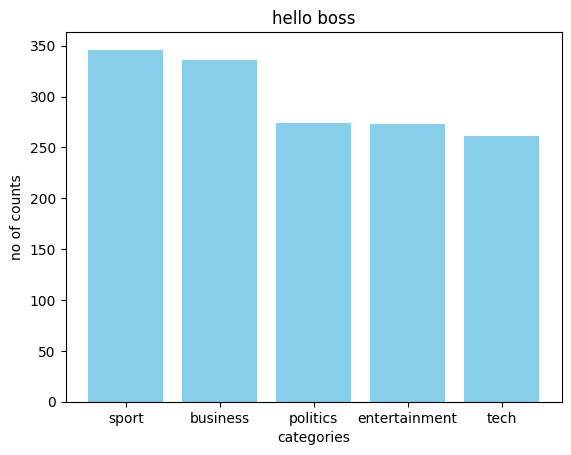

In [6]:
plt.Figure(figsize=(10,8))
plt.bar(count.index,count,color='skyblue')
plt.xlabel("categories")
plt.ylabel("no of counts")
plt.title("hello boss")
plt.show()

In [7]:
from wordcloud  import  WordCloud 


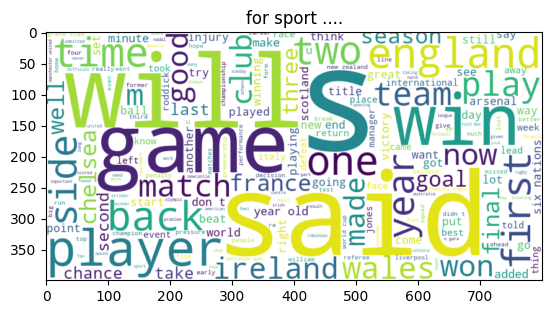

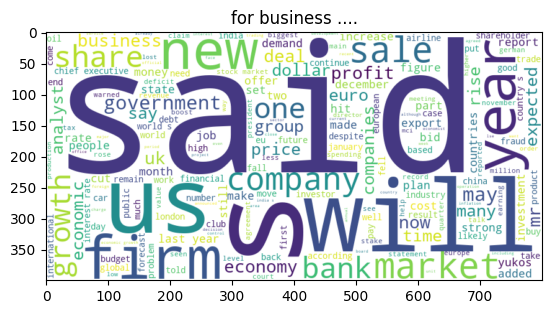

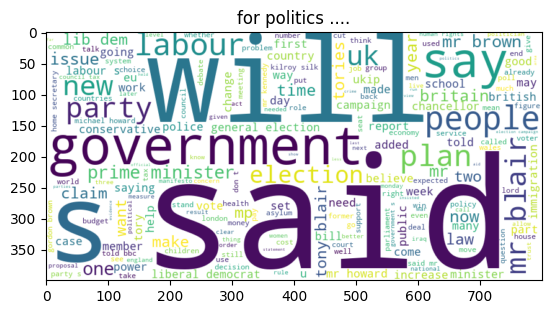

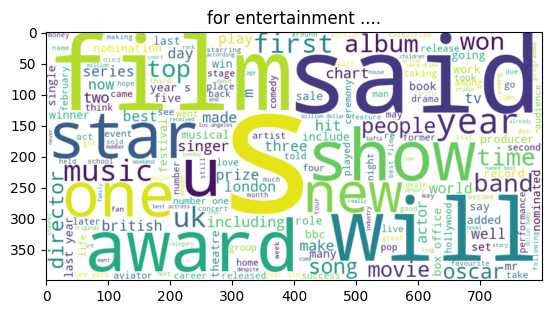

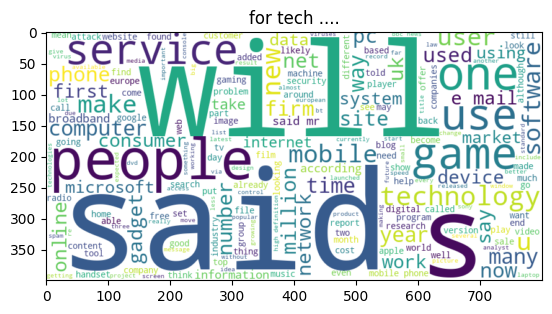

In [8]:
for category in count.index:
    text= " ".join( df[df['Category']== category ]['Text'].values)
    wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f"for {category} ....")
    plt.show()

In [9]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')# Intialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
print(stop_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...


{'from', 'itself', "wouldn't", 'further', "couldn't", "he'll", 'he', 'theirs', 'below', 'o', 've', 'just', 'few', 'both', "you've", 'hers', "it's", 'before', 're', 'needn', 'between', "they'd", 'but', 'she', 'mustn', 'of', 'for', "shouldn't", 'up', "he'd", 'to', "doesn't", 'until', "they'll", 'your', 'in', 'by', 's', 'some', 'such', 'can', 'ours', 'hasn', 'again', 'our', "she's", 'the', 'under', 'weren', 'themselves', 'with', 'haven', 'her', 'having', 'do', "i'm", 'should', 'these', 'out', "we'll", "it'd", 'where', 'y', "won't", "should've", 'then', 'any', "hadn't", 'ma', 'will', "we're", 'wouldn', "they're", 'won', "haven't", 'its', 'wasn', 'and', "that'll", 'only', 'all', "he's", 'what', 'above', "wasn't", 'while', 'were', "mustn't", 'doesn', 'aren', 'how', "shan't", 'during', 'about', 'who', 'am', 'down', "it'll", 'shouldn', "didn't", 'own', 'why', 'did', 'my', 'myself', 'ain', 'because', 'being', 't', 'you', 'if', 'here', "i'll", "needn't", 'now', "they've", 'does', 'was', 'his', "

[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
import re

def preprocess_text(text):
    text= text.lower()

    #remove special character and punctuation 

    text = re.sub(r'[^a-zA-Z\s]', '' ,text)

    # tokenization

    words = word_tokenize(text)

    # remove stopwords and lemantize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    

    #join back into a string 

    return " " .join(words)

In [11]:
text = "running is better than jumping"
print(preprocess_text(text))


running better jumping


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df['Text']
y=df['Category']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [15]:

nb_model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
nb_model.fit(X_train,y_train)
y_preds = nb_model.predict(X_test)
print(f'Accuracy={accuracy_score(y_test,y_preds)*100}')
print(f'classification Report \n {classification_report(y_test,y_preds)}')

Accuracy=96.30872483221476
classification Report 
                precision    recall  f1-score   support

     business       0.94      0.97      0.96        67
entertainment       1.00      0.92      0.96        63
     politics       0.95      0.98      0.96        56
        sport       0.97      1.00      0.99        70
         tech       0.95      0.93      0.94        42

     accuracy                           0.96       298
    macro avg       0.96      0.96      0.96       298
 weighted avg       0.96      0.96      0.96       298



In [16]:
# Make predictions on unseen data
new_texts = [
   'And even though his next destination was not mentioned in his emotional farewell video,'
   ' it is an open secret that he will join his friend and England colleague Jude Bellingham at Real Madrid.'
]

new_preds = nb_model.predict(new_texts)
for text,preds in zip(new_texts,new_preds):
    print(f'Text: {text}\nPredicted Category: {preds}')

Text: And even though his next destination was not mentioned in his emotional farewell video, it is an open secret that he will join his friend and England colleague Jude Bellingham at Real Madrid.
Predicted Category: sport


In [17]:
import joblib

joblib.dump(nb_model,'nb_model.pkl')
print("suces")

suces
